In [3]:
import plotly.offline as pyo
pyo.init_notebook_mode()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import preprocessing
import random
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
!pip install visualkeras
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree
from xgboost import plot_importance
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.3/992.3 kB 2.4 MB/s eta 0:00:0000:0100:01


In [4]:
def Create_Directory_DataFrame():
    df =pd.DataFrame(columns=['Class','Location'])
    basedir = '../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/'
    for Dir in os.listdir(basedir):
        for Class in os.listdir(basedir+Dir):
            for location in os.listdir(basedir+Dir+'/'+Class+'/'):
                df = df.append({'Class':Class,'Location':basedir+Dir+'/'+Class+'/'+location},ignore_index=True)
    df = df.sample(frac = 1) 
    return df
df = Create_Directory_DataFrame()
print(df.shape)
print(np.unique(df['Class']))
df.head()

(6400, 2)
['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


Class                                           Location
2092       NonDemented  ../input/alzheimers-dataset-4-class-of-images/...
2207       NonDemented  ../input/alzheimers-dataset-4-class-of-images/...
717   VeryMildDemented  ../input/alzheimers-dataset-4-class-of-images/...
1529       NonDemented  ../input/alzheimers-dataset-4-class-of-images/...
5814      MildDemented  ../input/alzheimers-dataset-4-class-of-images/...

In [5]:
for i in df.index:
    if df.loc[i,'Class'] == 'MildDemented' or df.loc[i,'Class'] == 'ModerateDemented':
        df.loc[i,'Class'] = 'Mild_Dimmented'
np.unique(df['Class'])

array(['Mild_Dimmented', 'NonDemented', 'VeryMildDemented'], dtype=object)

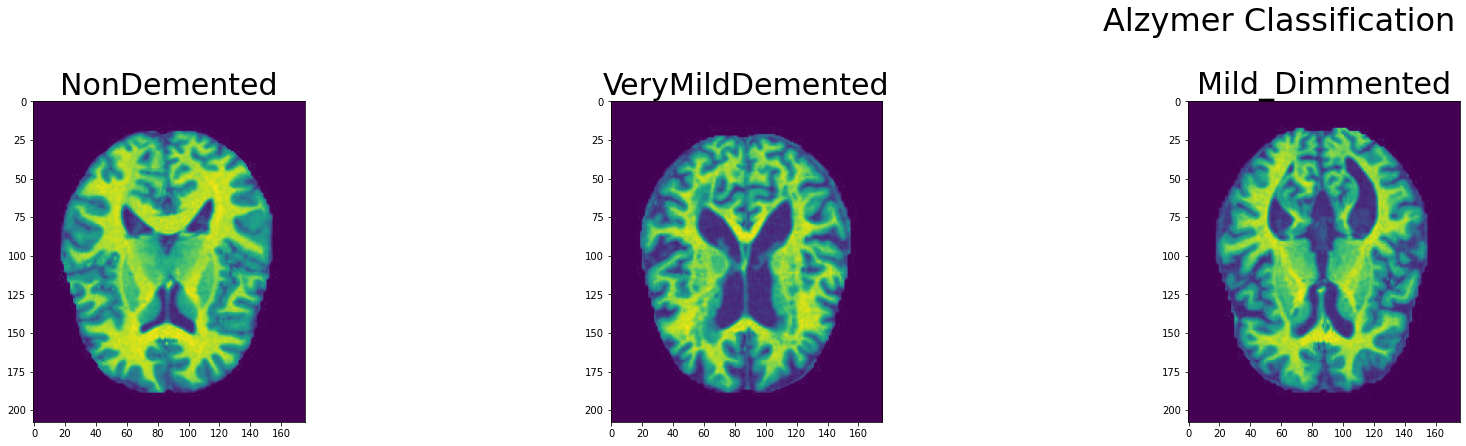

In [6]:
count = 1
f = plt.figure(figsize=(50,13))
for Class in df['Class'].unique():
    seg = df[df['Class']==Class]
    address =  seg.sample().iloc[0]['Location']
    img = cv2.imread(address,0)
    ax = f.add_subplot(2, 5,count)
    ax = plt.imshow(img)
    ax = plt.title(Class,fontsize= 30)
    count = count + 1
plt.suptitle("Alzymer Classification", size = 32)
plt.show()

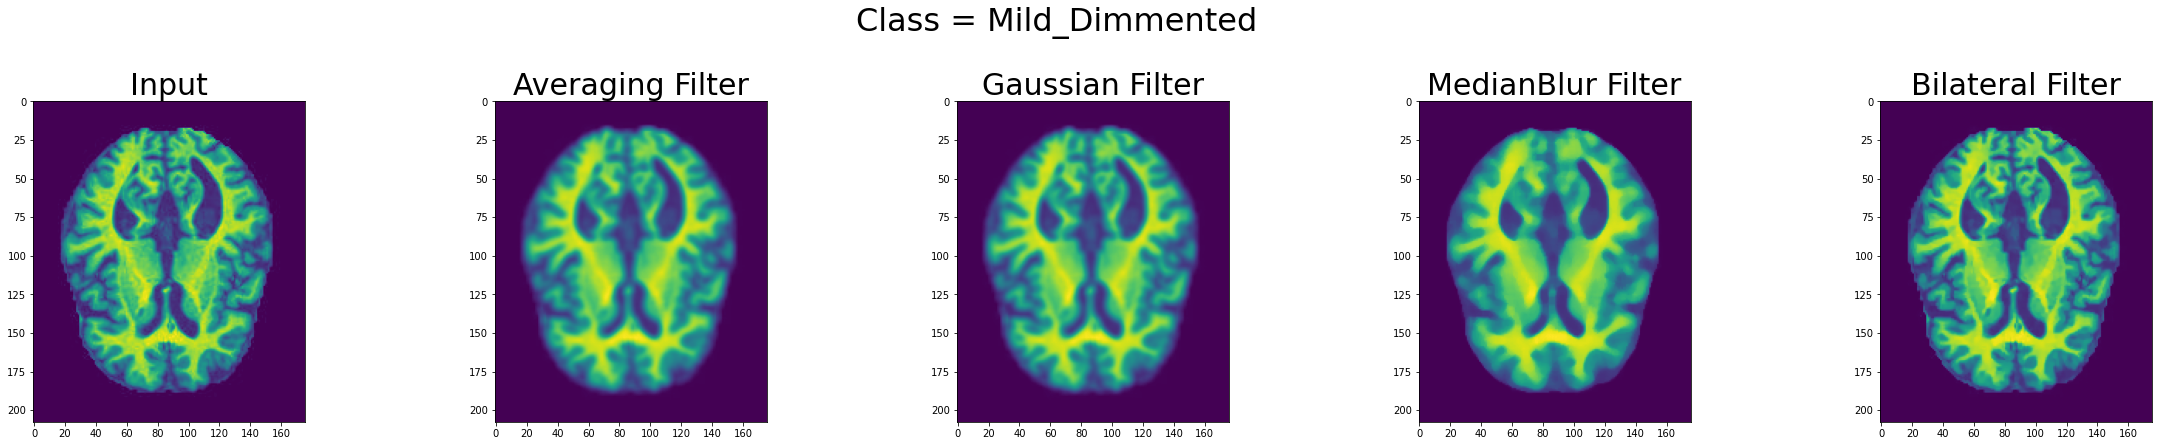

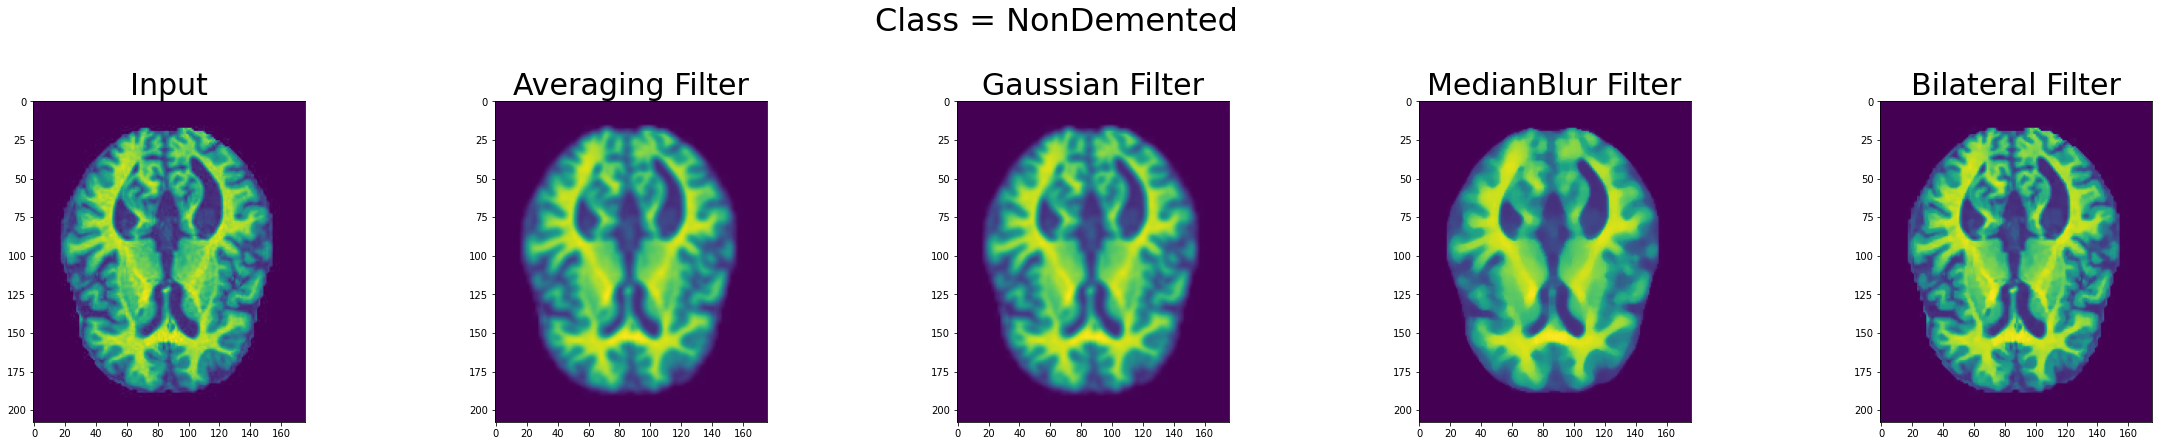

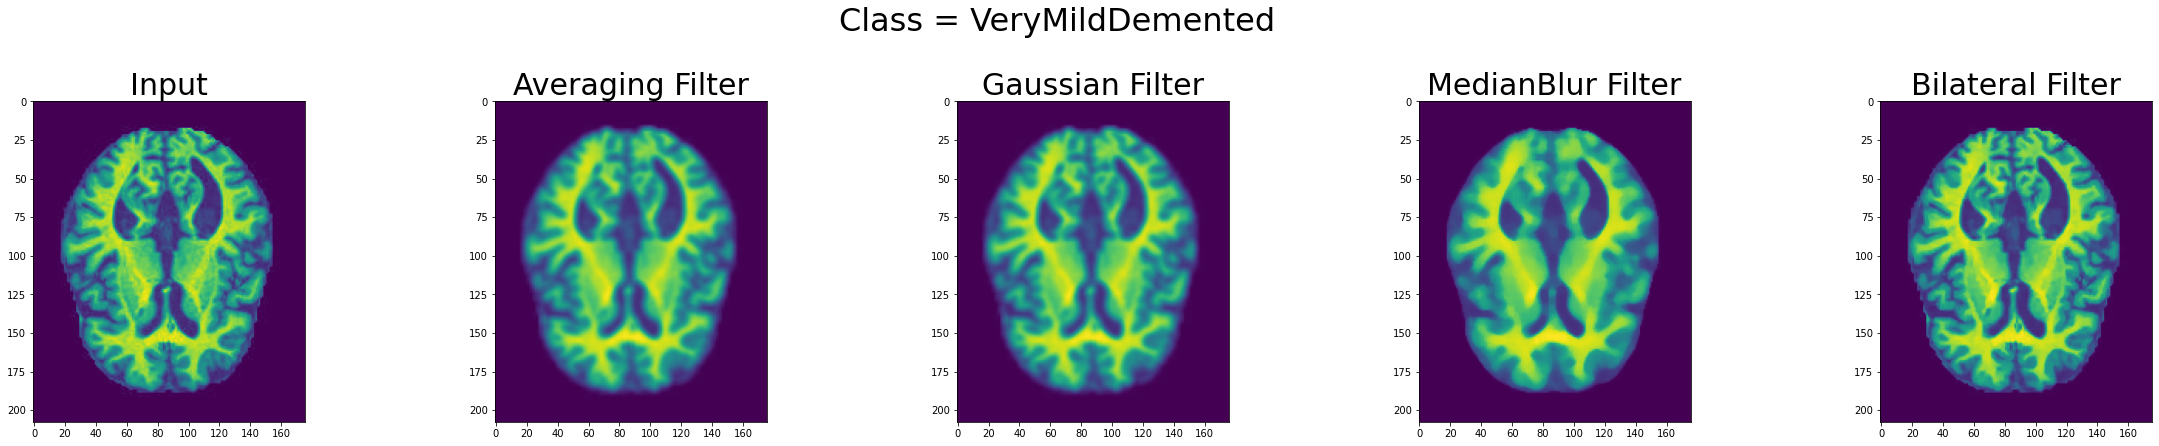

In [26]:
for Class in np.unique(df['Class']):
    temp = df[df['Class'] == Class].reset_index()
    ind = random.randint(0, temp.shape[0] - 1 )
    addr = temp.loc[ind,'Location']
    img = cv2.imread(address,0)
    f = plt.figure(figsize=(40,13))
    
    ax = f.add_subplot(2, 5,1)
    ax = plt.imshow(img)
    ax = plt.title('Input',fontsize= 30)
    ax = f.add_subplot(2, 5,2)
    ax = plt.imshow(cv2.blur(img,(5,5)))
    ax = plt.title('Averaging Filter',fontsize= 30)
    ax = f.add_subplot(2, 5,3)
    ax = plt.imshow(cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT) )
    ax = plt.title('Gaussian Filter',fontsize= 30)
    ax = f.add_subplot(2, 5,4)
    ax = plt.imshow(cv2.medianBlur(img,7))
    ax = plt.title('MedianBlur Filter',fontsize= 30)
    ax = f.add_subplot(2, 5,5)
    ax = plt.imshow(cv2.bilateralFilter(img, 5, 10, 10))
    ax = plt.title('Bilateral Filter',fontsize= 30)
    plt.suptitle("Class = " + Class, size = 32 )
    plt.show()

In [55]:
def bulding_histogram_graph(pic,pic_name):
    # unique_elements: rk, counts_elements: nk, number of pixels in the image: nm
    rk,nk = np.unique(pic, return_counts=True)
    nm=nk.sum()
    #frequency of the k level in the image: nk/nm 
    prK=nk/nm 
    rk = rk[1:]
    prK = prK[1:]
    fig, axs = plt.subplots(1,3)
    fig.suptitle('Histogram graph for'+' '+ pic_name)
    fig.subplots_adjust(left=0.1, wspace=0.4)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    axs[0].hist(pic.ravel(),100,[1,260])
    axs[0].set_xlabel("Intensity values")
    axs[0].set_ylabel("Counts values")
    axs[0].set_title("Image histogram")

    axs[1].plot(rk,prK, 'rs--')
    axs[1].set_xlabel("Value-rk")
    axs[1].set_ylabel("Frequency-pr(k)")
    axs[1].set_title("Frequency diagram")

    axs[2].imshow(pic)
    axs[2].axis('off')
    axs[2].set_title(pic_name)

    plt.show()

In [ ]:
def convert(img):
    return img.reshape(img.shape[0],img.shape[1],1)
def load_image(ext):
    
    pic=Image.open(ext).convert('RGB')
    pic.load()
    
    return pic

def convert_image_to_array(pic):
    
    return np.array(pic)

def plot_image(images):
        
    n=131
    plt.figure(figsize=(15,15))
    for img in images:
        plt.subplot(n)
        plt.imshow(img,interpolation='nearest')
        plt.axis('off')
        n+=1
    plt.show()

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from matplotlib import cm
import imageio
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

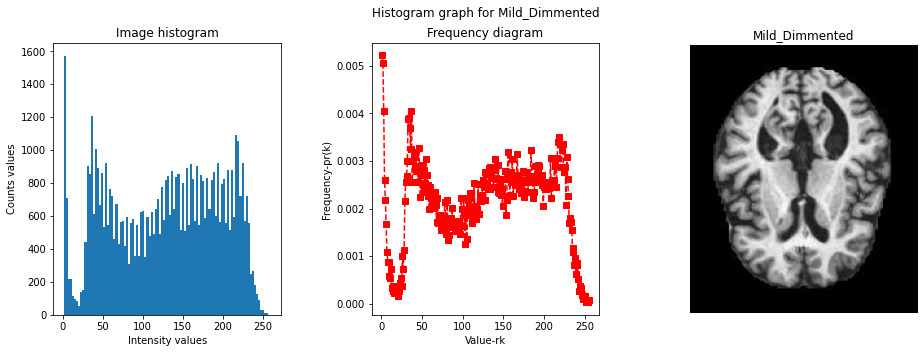

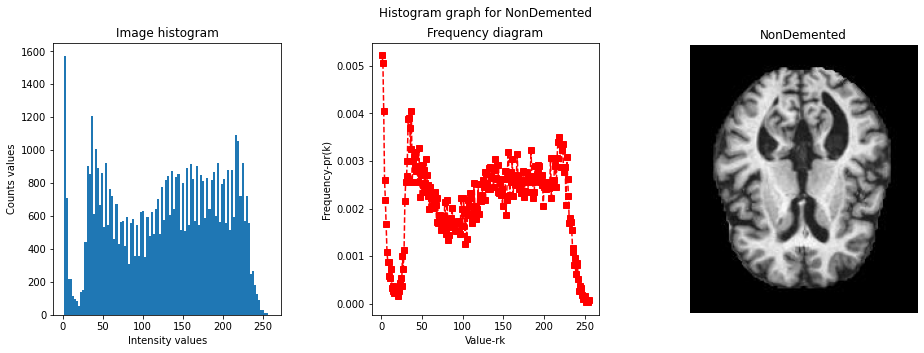

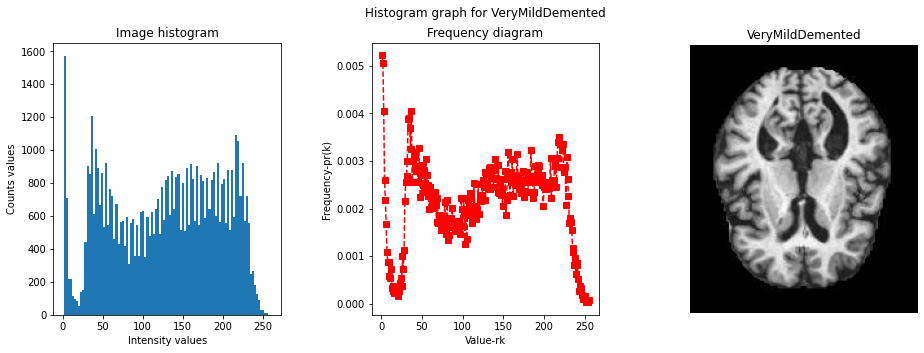

In [56]:
for Class in np.unique(df['Class']):
    temp = df[df['Class'] == Class].reset_index()
    ind = random.randint(0, temp.shape[0] - 1 )
    addr = temp.loc[ind,'Location']
    img = cv2.imread(address)
    bulding_histogram_graph(img,Class)

In [89]:
def calculate_cumulative_distribution_function(prK):
    cdf=np.zeros(shape=((prK.shape)), dtype='float64')
    for v in range(len(prK)):
        if(v==0):
            cdf[v]=(prK[v])
            
        else:
            
            cdf[v]=(prK[v]+cdf[v-1])
            
            
    return cdf
def plot_equalized_and_noequalized_histogram(pic,new_pic,pic_name):
    
    lt =[]
    for i in new_pic.ravel():
        if i!=117:
            lt.append(i)
    fig, axs = plt.subplots(1,2)
    fig.suptitle('Histogram graph for'+' '+ pic_name)
    fig.subplots_adjust(left=0.1, wspace=0.4)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    axs[0].hist(pic.ravel(),100,[1,260])
    axs[0].set_xlabel("Intensity values")
    axs[0].set_ylabel("Counts values")
    axs[0].set_title("No equalized image histogram")
    axs[1].hist(lt,100,[1,260])
    axs[1].set_xlabel("Intensity values")
    axs[1].set_ylabel("Counts values")
    axs[1].set_title("Equalized Image histogram")
    
    plt.show()
def equalizing_histogram(pic):
    
    L_1=255
    rk,nk = np.unique(pic, return_counts=True)
    prK=nk/nk.sum()
    cdf=calculate_cumulative_distribution_function(prK)
    trK=cdf*L_1
    sk=trK.round()
    new_image=np.ndarray(shape=((pic.shape)), dtype='int64')
    
    for i in range(pic.shape[0]):
        
        for j in range(pic.shape[1]):
            
            for k in range(len(rk)):
                
                if(pic[i][j][0] == rk[k]):
                    
                    new_image[i][j] = sk[k]
 
           
    return new_image

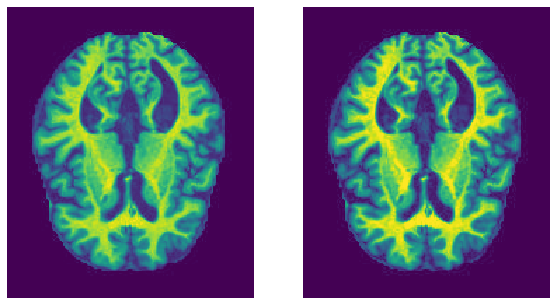

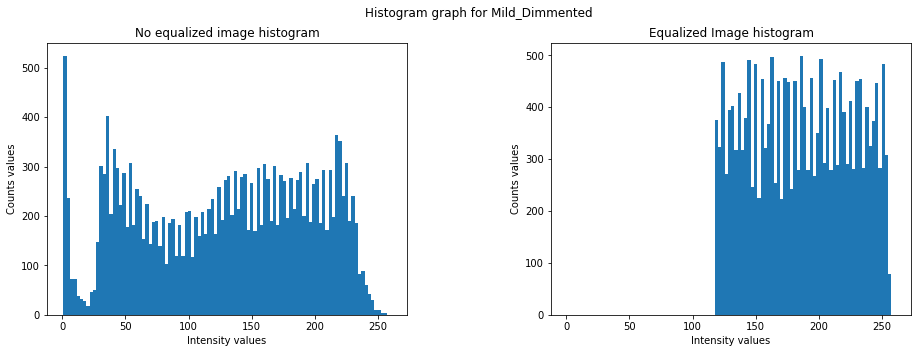

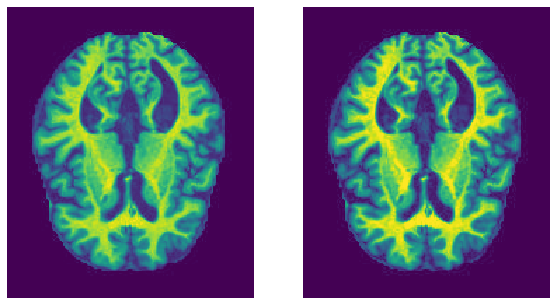

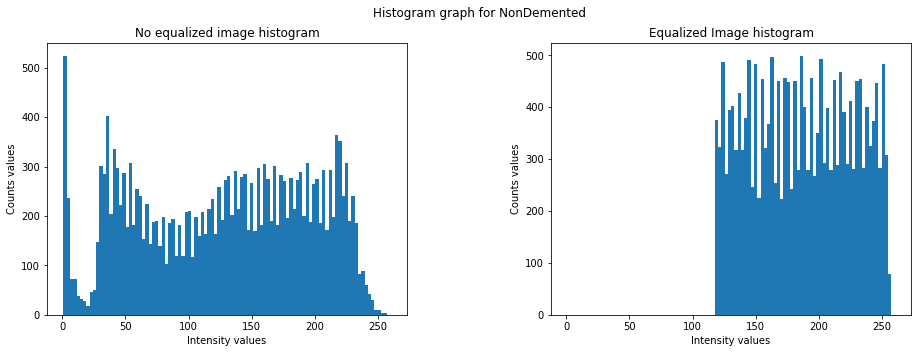

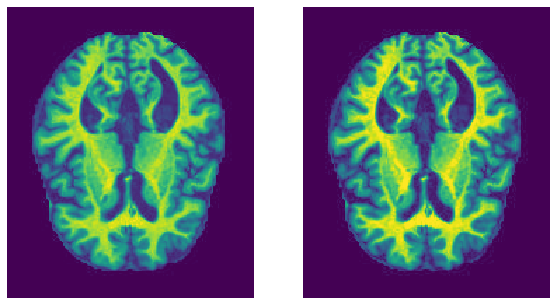

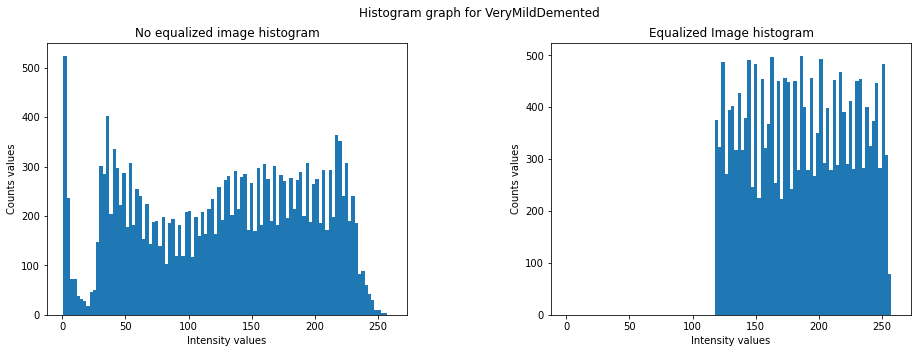

In [90]:
for Class in np.unique(df['Class']):
    temp = df[df['Class'] == Class].reset_index()
    ind = random.randint(0, temp.shape[0] - 1 )
    addr = temp.loc[ind,'Location']
    img = cv2.imread(address,0)
    img2=equalizing_histogram(convert(img))
    plot_image([convert(img),img2])
    plot_equalized_and_noequalized_histogram(convert(img),img2,Class)